IMPORTING THE NESSECARY LIBRARIES

In [56]:
#Importing the libraries
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 

In [57]:
# Load the data
file_path = r"D:/Aditi Patel_CuvetteDS/Aditi Patel_Machine Learning/Loan_data.csv"
loan_data = pd.read_csv(file_path)

Clean the dataset

In [58]:

# Fill missing values for categorical columns with mode
for col in loan_data.columns:
    if loan_data[col].dtype in ['int64', 'float64']:
        loan_data[col] = loan_data[col].fillna(loan_data[col].mean())
    else:
        loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])


REMOVE THE OUTLIERS

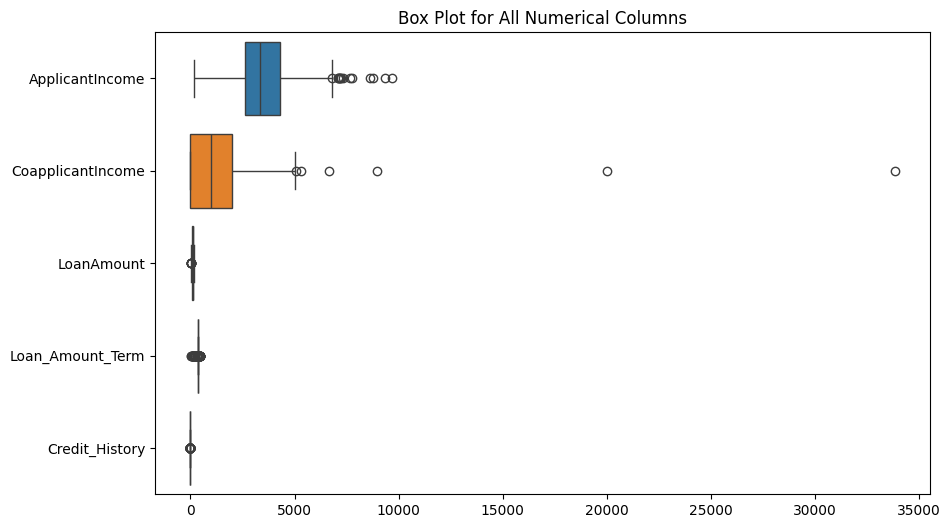

In [59]:
 # Function to detect and optionally remove outliers using Z-Score
def detect_outliers_z_score(data, threshold=2.5):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    outliers_dict = {}

    for column in numerical_cols:
        # Drop NaN values to avoid calculation issues
        column_data = data[column].dropna()
        
        # Calculate Z-scores (ignoring NaNs)
        z_scores = stats.zscore(column_data, nan_policy='omit')
        
        # Identify outliers based on the Z-Score threshold
        outliers = data.loc[abs(z_scores) > threshold]
        outliers_dict[column] = outliers

    return outliers_dict

# Detect outliers for all numerical columns
outliers_dict = detect_outliers_z_score(loan_data)

# Visualization 1: Combined Box Plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data.select_dtypes(include=[np.number]), orient='h')
plt.title('Box Plot for All Numerical Columns')
plt.show()


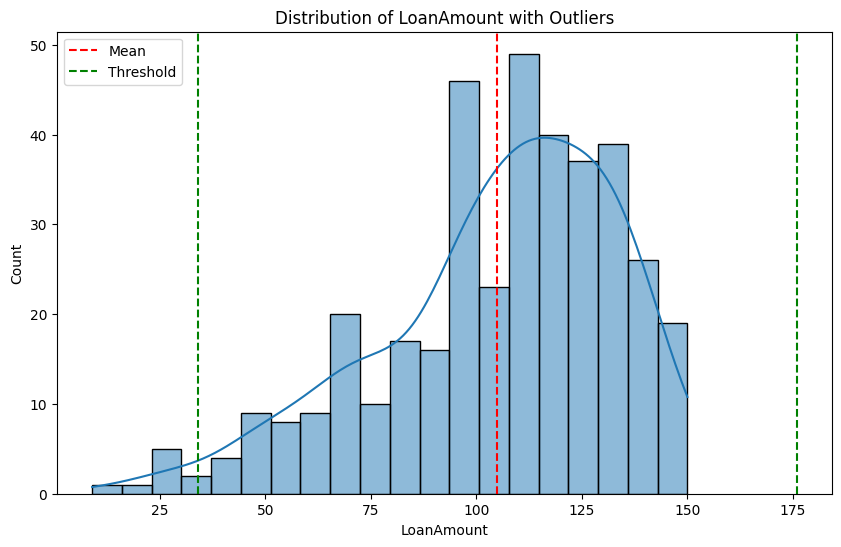

In [60]:

# Visualization 2: Distribution of a specific column with outliers
column_to_visualize = 'LoanAmount'  # Choose a numerical column to visualize

plt.figure(figsize=(10, 6))
sns.histplot(loan_data[column_to_visualize], kde=True, bins=20)
plt.axvline(x=loan_data[column_to_visualize].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=loan_data[column_to_visualize].mean() + 2.5 * loan_data[column_to_visualize].std(), 
            color='g', linestyle='--', label='Threshold')
plt.axvline(x=loan_data[column_to_visualize].mean() - 2.5 * loan_data[column_to_visualize].std(), 
            color='g', linestyle='--')
plt.legend()
plt.title(f'Distribution of {column_to_visualize} with Outliers')
plt.show()


In [61]:

# Print outliers for each column 
for col, outliers in outliers_dict.items():
    print(f"\nOutliers in {col}:")
    print(outliers)


Outliers in ApplicantIncome:
     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
14     Male     Yes          0  Not Graduate            No             7660   
72     Male      No          0  Not Graduate            No             7333   
99     Male     Yes          0      Graduate            No             9323   
153    Male     Yes          2      Graduate            No             9703   
163  Female      No          0      Graduate            No             7200   
235    Male     Yes         3+      Graduate            No             8750   
240    Male      No          0      Graduate           Yes             7167   
269    Male     Yes          1      Graduate            No             7250   
275  Female      No          1      Graduate           Yes             8624   
280  Female     Yes          0  Not Graduate           Yes             7142   
294    Male     Yes         3+      Graduate            No             7740   

     CoapplicantIncom

SPLIT THE DATASET AS TESTING AND TRANING DATA

In [62]:

# Split the data into features and target variable
X = loan_data_encoded.drop('Loan_Status', axis=1)  # Features
y = loan_data_encoded['Loan_Status']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




STANDARDIZE THE DATA


In [63]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


DEFINE THE MODELS

In [64]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LDA(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

Logistic Regression - Accuracy: 0.81

              precision    recall  f1-score   support

           N       0.88      0.33      0.48        21
           Y       0.80      0.98      0.88        56

    accuracy                           0.81        77
   macro avg       0.84      0.66      0.68        77
weighted avg       0.82      0.81      0.77        77



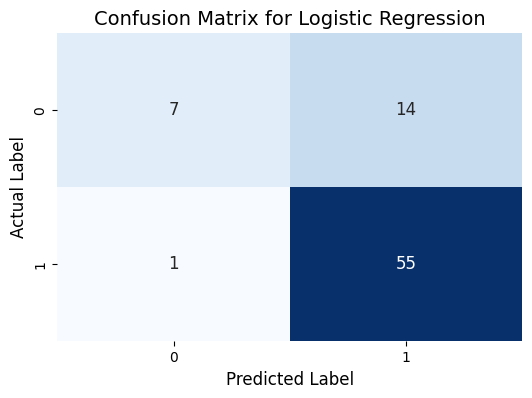

--------------------------------------------------
LDA - Accuracy: 0.82

              precision    recall  f1-score   support

           N       1.00      0.33      0.50        21
           Y       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



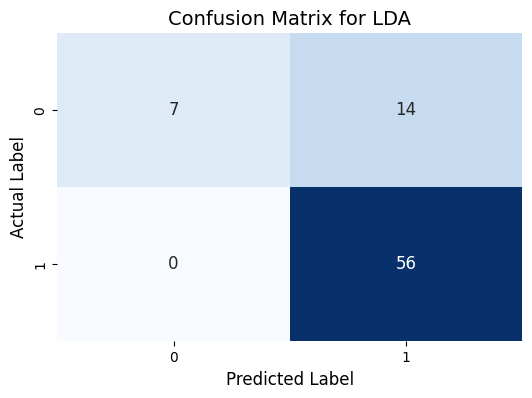

--------------------------------------------------
KNN - Accuracy: 0.75

              precision    recall  f1-score   support

           N       0.67      0.19      0.30        21
           Y       0.76      0.96      0.85        56

    accuracy                           0.75        77
   macro avg       0.71      0.58      0.57        77
weighted avg       0.73      0.75      0.70        77



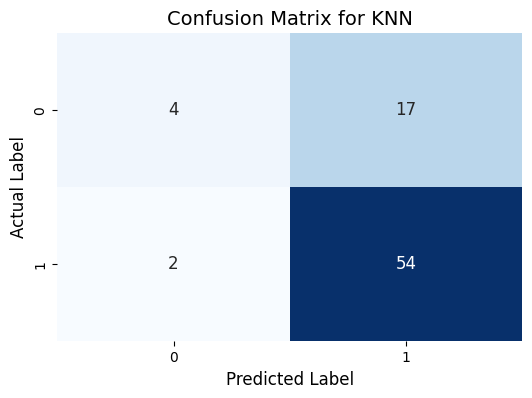

--------------------------------------------------
Decision Tree - Accuracy: 0.73

              precision    recall  f1-score   support

           N       0.50      0.38      0.43        21
           Y       0.79      0.86      0.82        56

    accuracy                           0.73        77
   macro avg       0.64      0.62      0.63        77
weighted avg       0.71      0.73      0.71        77



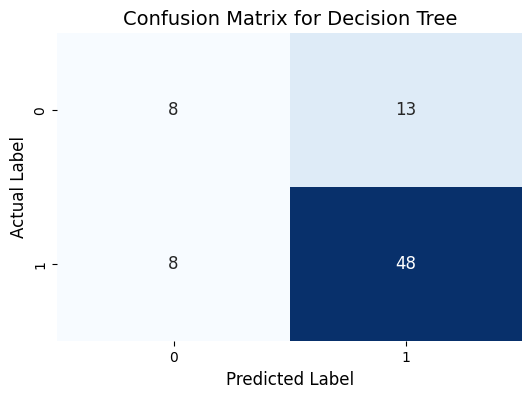

--------------------------------------------------


In [65]:
# Train and evaluate models with visualizations
model_accuracies = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy  
    
    print(f"{model_name} - Accuracy: {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', 
                cbar=False, annot_kws={"size": 12})
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('Actual Label', fontsize=12)
    plt.show()

    print("-" * 50)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_27792\3269193063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


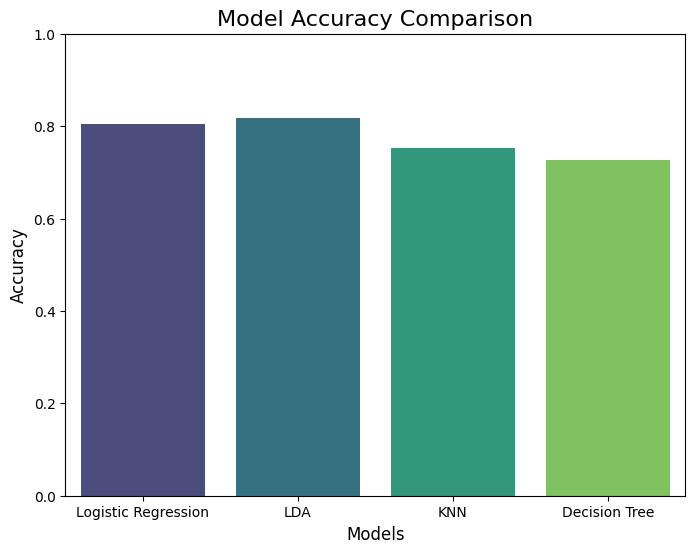

In [66]:

# Plot a bar chart to compare model accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

Finally created the model!!